In [22]:
# PCA on the whole training dataset with both classes
import numpy as np
import os
from PIL import Image
import helper
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# width size
w = 512

# height size
h = 512

# number of channels
c = 3


imSize = w * h * c
noImage = 750
noFeatures = 500

In [3]:
print(f"------------------------PCA via covariance matrix-------------------------------")
# read X from folder
X = np.zeros((w * h * c, noImage))

source_train_normal = "./../../../datasets/rosacea-detection/train/normal"
source_train_rosacea = "./../../../datasets/rosacea-detection/train/rosacea"

print("Loading normal faces to X ...")
for i, filename in zip(range(500), os.listdir(source_train_normal)):
    filepath = os.path.join(source_train_normal, filename)
    img = Image.open(filepath)
    X[:, i] = (np.array(img) / 255.0).flatten().copy()
print(f"normal faces loaded.")

print("Loading rosacea faces to X ...")
for i, filename in zip(range(500, 750, 1), os.listdir(source_train_rosacea)):
    filepath = os.path.join(source_train_rosacea, filename)
    img = Image.open(filepath)
    X[:, i] = (np.array(img) / 255.0).flatten().copy()
print(f"rosacea faces loaded.")

------------------------PCA via covariance matrix-------------------------------
Loading normal faces to X ...
normal faces loaded.
Loading rosacea faces to X ...
rosacea faces loaded.


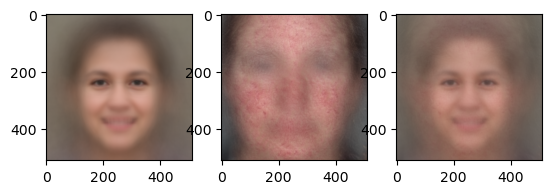

In [4]:
# Mean Vector
meanNormal = np.mean(X[:,:500], 1)
meanRosacea = np.mean(X[:, 500:], 1)
meanFace = np.mean(X, 1)

fig, axs = plt.subplots(1,3)
axs[0].imshow(np.reshape(meanNormal, (w, h, c)))
axs[1].imshow(np.reshape(meanRosacea, (w, h, c)))
axs[2].imshow(np.reshape(meanFace, (w, h, c)))

In [5]:
# center data matrix
for i in range(noImage):
    X[:, i] = X[:, i] - meanFace

In [6]:
# find out the rank of the data matrix
print(f"The rank of the data matrix is: {np.linalg.matrix_rank(X)}")

The rank of the data matrix is: 749


In [8]:
# step 1 : eig, mxm
eVals, eVects = np.linalg.eig(np.matmul(np.transpose(X), X) / (noImage - 1))

In [10]:
# eigenvectors are orthogonal and normalized
print(np.shape(eVals))
print(np.matmul(eVects, np.transpose(eVects)))

(750,)
[[ 1.00000000e+00 -9.24858089e-14 -3.06294330e-14 ... -1.71038741e-13
   5.55655070e-14 -1.33175013e-13]
 [-9.24858089e-14  1.00000000e+00  5.91870303e-14 ... -4.03768273e-14
  -3.31350751e-13 -1.50773979e-13]
 [-3.06294330e-14  5.91870303e-14  1.00000000e+00 ...  8.02916761e-14
   2.43114990e-13  4.21711277e-15]
 ...
 [-1.71038741e-13 -4.03768273e-14  8.02916761e-14 ...  1.00000000e+00
   4.73013555e-14  2.85093130e-14]
 [ 5.55655070e-14 -3.31350751e-13  2.43114990e-13 ...  4.73013555e-14
   1.00000000e+00  4.99791181e-14]
 [-1.33175013e-13 -1.50773979e-13  4.21711277e-15 ...  2.85093130e-14
   4.99791181e-14  1.00000000e+00]]


In [11]:
# Step 2 : eig. nxn;
# Eigenvectors or Eigenfaces
Evect = np.matmul(X, eVects)


In [12]:
print(np.linalg.norm(Evect[:,0]))

2356.6274350666317


In [13]:
# Step 3 : normalization
Evect_norm = np.zeros((imSize, noImage))
for i in range(noImage):
    Evect_norm[:, i] = Evect[:, i] / np.linalg.norm(Evect[:,i])

In [17]:
print(np.linalg.norm(Evect_norm[:,0]))

0.9999999999999998


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6533449658091125..0.26141941915509653].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.32417510215086415..0.9454248337609082].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7628105739415758..0.5976704171567825].


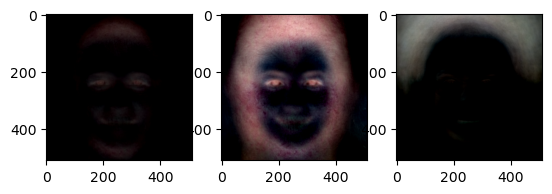

In [31]:
# Display the EigenVectors:
fig, axs = plt.subplots(1,3)
axs[0].imshow(np.reshape(Evect_norm[:,0] * 255, (w, h, c)))
axs[1].imshow(np.reshape(Evect_norm[:,1] * 255, (w, h, c)))
axs[2].imshow(np.reshape(Evect_norm[:,2] * 255, (w, h, c)))

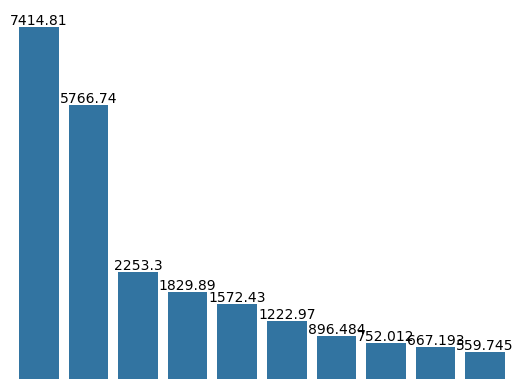

In [27]:
# display the first 10 EigenValues
# print(eVals)
ax = sns.barplot(x = np.arange(10), y = eVals[:10])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.show()

------------------------PCA for image Compression-------------------------------


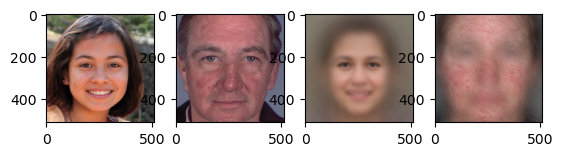

In [30]:
print(f"------------------------PCA for image Compression-------------------------------")
fig, axs = plt.subplots(1,4)
axs[0].imshow(np.reshape(X[:,0] + meanFace, (w, h, c)))
axs[1].imshow(np.reshape(X[:,500] + meanFace, (w, h, c)))
axs[2].imshow(np.reshape(meanNormal, (w,h,c)))
axs[3].imshow(np.reshape(meanRosacea, (w,h,c)))